In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from neupy import algorithms, utils

In [2]:
df = pd.read_csv('ppe.dat',delim_whitespace=True)
print(df.head())

      x     y
0  2376 -6504
1  5072 -6288
2 -6520  5008
3   944 -6408
4 -1784   264


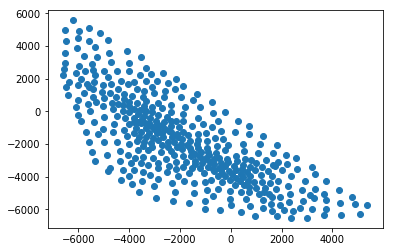

In [3]:
twodee = plt.figure().gca()
twodee.scatter(df['x'],df['y'])

In [4]:
# scale the input to the order of -1...1

data = df[['x','y']]*0.001

In [5]:
# instantiate the GNG network

def create_gng(max_nodes, step=0.5, n_start_nodes=2, max_edge_age=15):
    return algorithms.GrowingNeuralGas(
        n_inputs=2,
        n_start_nodes=n_start_nodes,

        shuffle_data=True,
        verbose=True,

        step=step,
        neighbour_step=0.05,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,

        n_iter_before_neuron_added=10,
        after_split_error_decay_rate=0.1,
        error_decay_rate=0.995,
        min_distance_for_update=0.01,
    )

In [9]:
# draw the GNG network

def draw_image(graph, show=True):
    
    fig = plt.figure(figsize=(10,7))
    ax = Axes3D(fig)
    
    for node_1, node_2 in graph.edges:
        x1 = node_1.weight.item(0)
        y1 = node_1.weight.item(1)
        z1 = 0
        x2 = node_2.weight.item(0)
        y2 = node_2.weight.item(1)
        z2 = 0
        ax.scatter(x1, y1, z1, c='black', s=20, edgecolors='k', alpha=0.7) # draw nodes
        ax.plot([x1,x2],[y1,y2],[z1,z2],zdir='z',c='black',label='gng')   # draw connections

    if show:
        ax.scatter(data['x'],data['y'],0,c='gray',s=10) # draw data / features
        plt.show()


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.1
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 15
[OPTION] max_nodes = 50
[OPTION] min_distance_for_update = 0.01
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 10
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.05
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.5
[OPTION] verbose = True

#1 : [32 ms] train: 0.998747


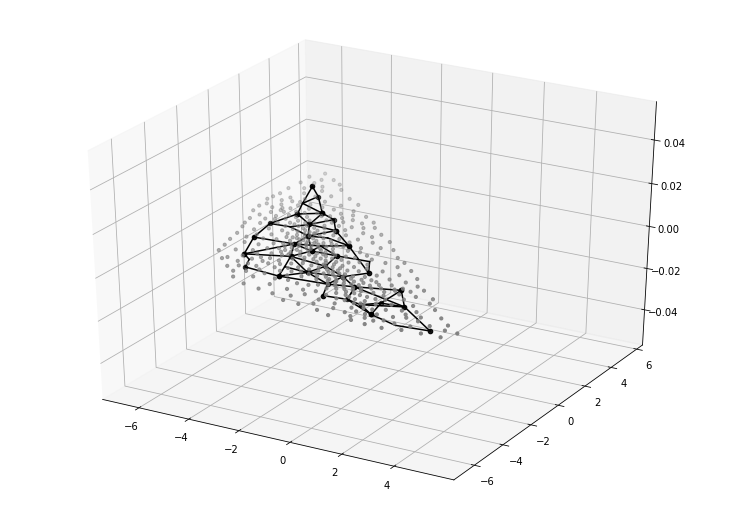

#2 : [39 ms] train: 0.542860


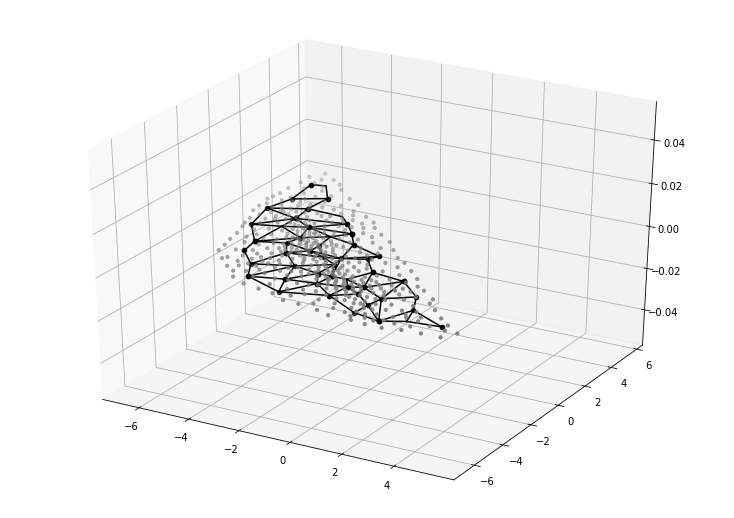

#3 : [39 ms] train: 0.517244


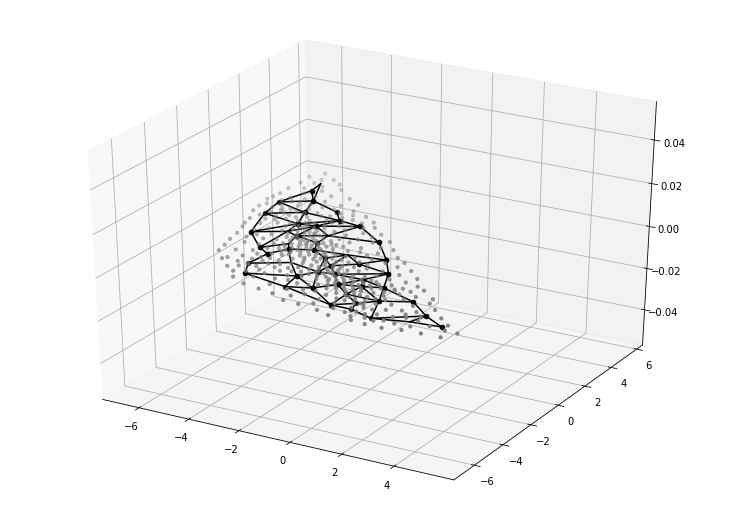

#4 : [40 ms] train: 0.518059


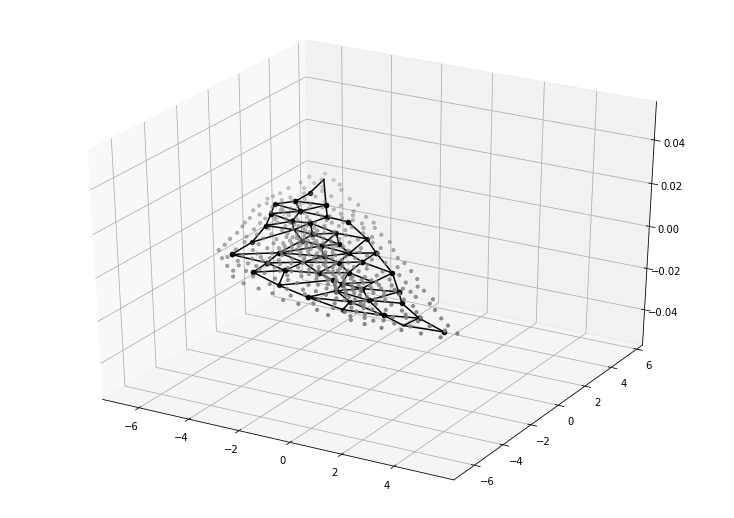

#5 : [40 ms] train: 0.510391


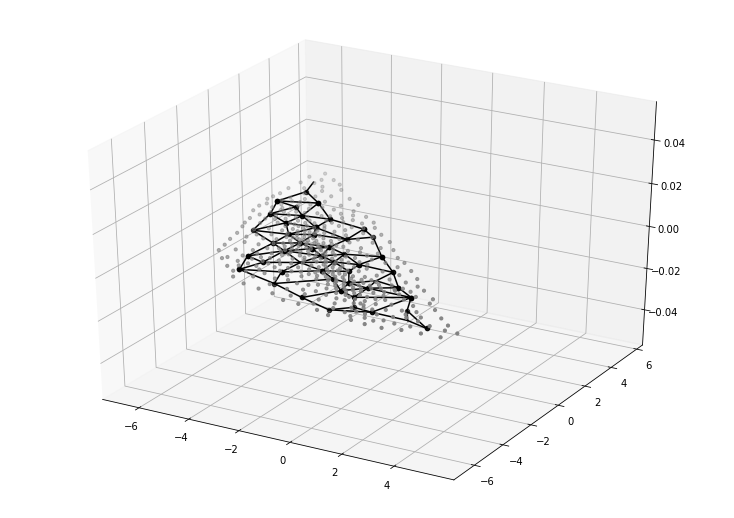

#6 : [38 ms] train: 0.517120


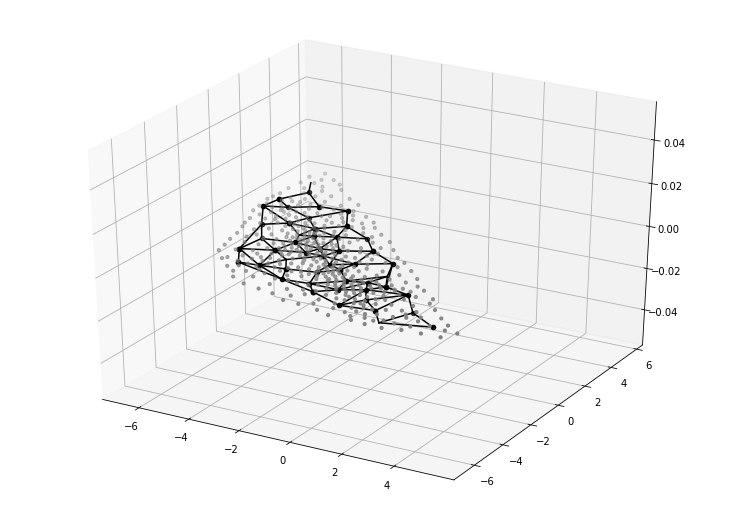

#7 : [40 ms] train: 0.516602


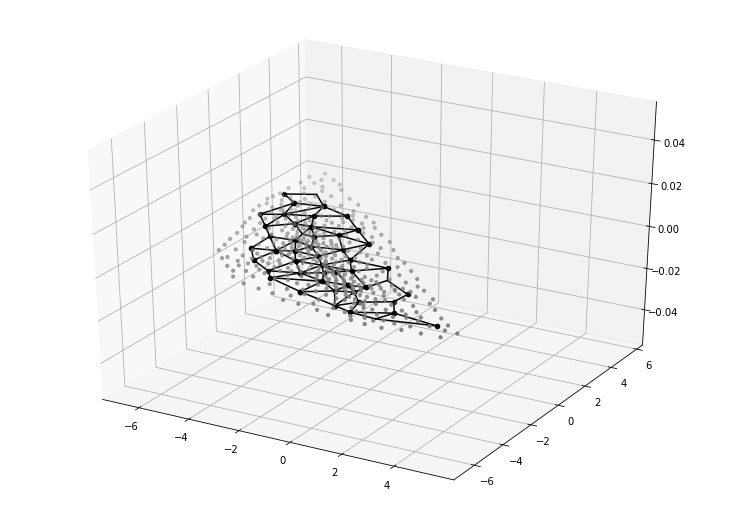

#8 : [41 ms] train: 0.525192


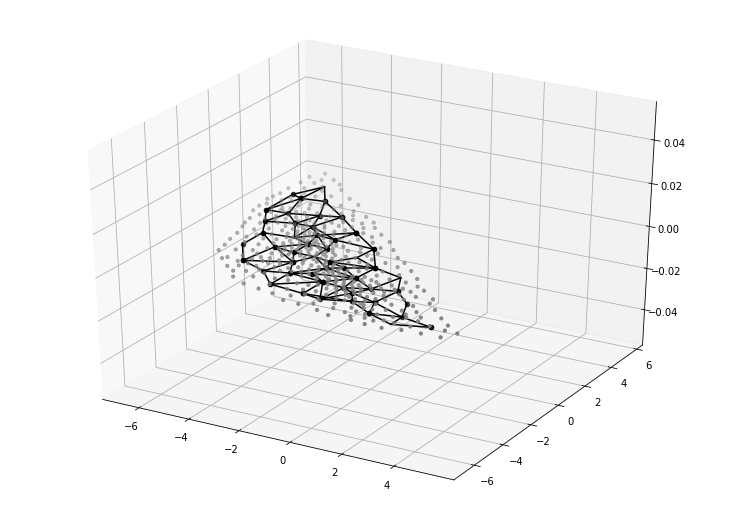

#9 : [41 ms] train: 0.514797


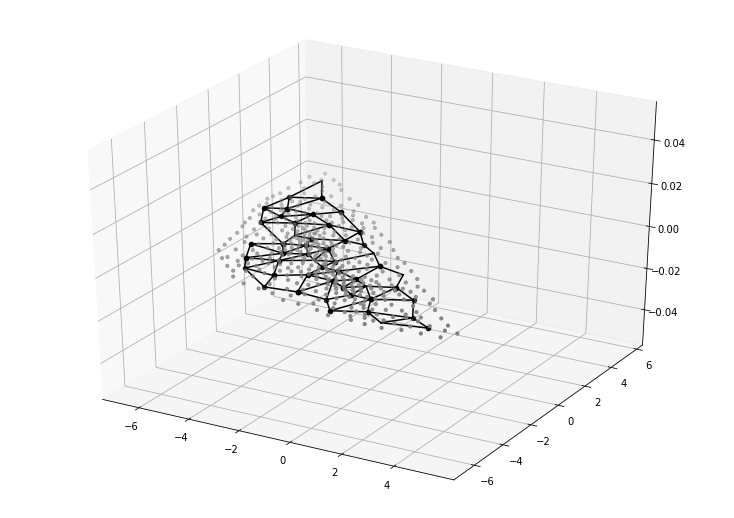

#10 : [40 ms] train: 0.511539


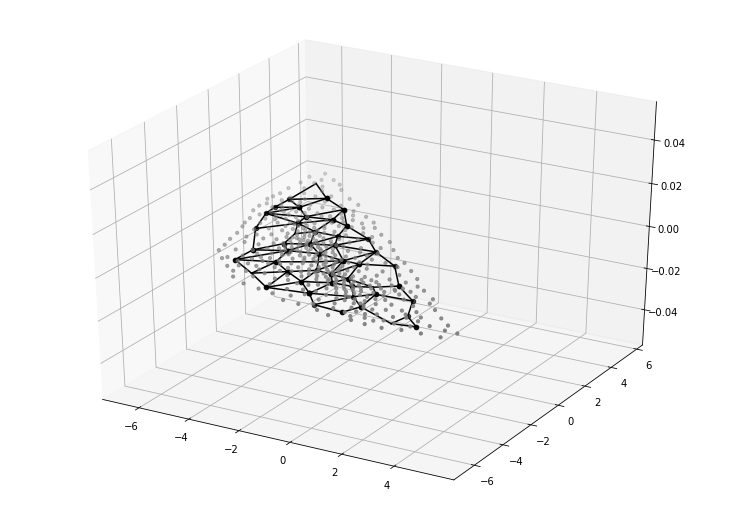

In [14]:
# train the GNG netowrk

utils.reproducible()
gng = create_gng(max_nodes=50)

for epoch in range(10):
    gng.train(data, epochs=1)
    
    # Plot images after each iteration in order to see training progress
    draw_image(gng.graph)